# Teste Placa L

## Insira os dados aqui:

In [1]:
# Número da Placa (Placa 0, 1, 2 ou 3)
placa = 1

# Tamanho da aquisição de dados, 12x12 ou 13x13
tamanho = 12

# Nome dos arquivos com a extensão, dentro da pasta "data"

frequencia1_cima_Z_name  = '1 - 24M_cima_Z.xlsx'
frequencia1_baixo_Z_name = '1 - 24M_baixo_Z.xlsx'

frequencia1_cima_H_name  = '1 - 24M_cima_H.xlsx'
frequencia1_baixo_H_name = '1 - 24M_baixo_H.xlsx'

frequencia2_cima_Z_name  = '1 - 500k_cima_Z.xlsx'
frequencia2_baixo_Z_name = '1 - 500k_baixo_Z.xlsx'
    
# Para salvar as imagens para vídeo é só colocar `save = 1`
save = 0

Para instalar as bibliotecas necessárias:

In [2]:
#!pip install numpy matplotlib seaborn xlrd

** Inicialização de Bibliotecas e configuração para o plot: **

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
from scipy import interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_style('darkgrid')

%matplotlib inline

** Modificar a aparência dos Plots: **

In [4]:
params = {'font.size': 20, 
          'axes.edgecolor': 'black', 
          'axes.linewidth': 2, 
#          'ytick.color' : 'w',
#          'xtick.color' : 'w',
#          'axes.labelcolor' : 'w', 
#          'axes.edgecolor' : 'w', 
#          'text.color': 'w'
         }
plt.rcParams.update(params)  

** Leitura dos Arquivos: **

In [5]:
if tamanho == 12:
    names = ('A','B','C','D','E','F','G','H','I','J','K','L')
elif tamanho == 13:
    names = ('A','B','C','D','E','F','G','H','I','J','K','L','M')
    
pasta = 'data/'

frequencia1_cima_Z   = pd.read_excel(pasta + frequencia1_cima_Z_name,   names=names, header=None)
frequencia1_baixo_Z  = pd.read_excel(pasta + frequencia1_baixo_Z_name,  names=names, header=None)

frequencia1_cima_H   = pd.read_excel(pasta + frequencia1_cima_H_name,   names=names, header=None)
frequencia1_baixo_H  = pd.read_excel(pasta + frequencia1_baixo_H_name,  names=names, header=None)

frequencia2_cima_Z   = pd.read_excel(pasta + frequencia2_cima_Z_name,   names=names, header=None)
frequencia2_baixo_Z  = pd.read_excel(pasta + frequencia2_baixo_Z_name,  names=names, header=None)

** Espelhamento das colunas de baixo: **

Necessário espelhar os dados de baixo para se ter a mesma visão superior com os dados de cima.

In [6]:
frequencia1_baixo_Z   = frequencia1_baixo_Z[frequencia1_baixo_Z.columns[::-1]]
frequencia1_baixo_H   = frequencia1_baixo_H[frequencia1_baixo_H.columns[::-1]]
frequencia2_baixo_Z  = frequencia2_baixo_Z[frequencia2_baixo_Z.columns[::-1]]

** Valores globais para comparar entre enquipes: **

In [7]:
vmax_Z_global = 10
vmin_Z_global = -60
vmax_H_global = -20
vmin_H_global = -80

** Definição das funções: **

A função `plot_heatmap` faz a plotagem em si do dataframe passado. E para plotar vários dataframes com a mesma escala pode-se utilizar a função wrapper `plot_heatmaps`, colocando quantos dataframes quiser na ordem de argumentos: dataframe e título do plot. Por exemplo: plot_heatmaps(dataframe_1, 'Título_1', dataframe_2, 'Título_2', ...)

In [8]:
def plot_heatmap(data, title, vmax, vmin):
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,1.5,1.5])
    im = ax.imshow(data.values, interpolation='gaussian', cmap='inferno', origin='upper', 
                   extent=[0, data.shape[0], data.shape[0], 0], vmax=vmax, vmin=vmin)
    plt.title(title)
    plt.xticks(np.arange(0,data.shape[0]+1,2),names[::2])
    
    
    if tamanho == 13:
        d = 0.5
    else:
        d = 0
        
    chanfro_rect = patches.Rectangle(np.array(chanfro[:2])+np.array((d,d)),chanfro[2],chanfro[3],linewidth=7,edgecolor='w',facecolor='none')
    ax.add_patch(chanfro_rect)
    borda_da_placa = patches.Rectangle((1+d,1+d),10,10,linewidth=7,edgecolor='w',facecolor='none')
    ax.add_patch(borda_da_placa)
    
    trilha_points = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
    trilha_points_deslocado = [[x+d,y+d] for x,y in trilha_points]
    trilha = patches.Polygon(np.array(trilha_points_deslocado),lw=3, ec='r',fc='none')
    ax.add_patch(trilha)
    
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    
    plt.savefig("exports/imgs/%s.png" % title,bbox_inches="tight")
    
    plt.show()
    
    
    
def plot_heatmaps(*args):
    dfs = args[::2]
    titles = args[1::2]
    vmax = max(df.values.max() for df in dfs)
    vmin = min(df.values.min() for df in dfs)
    for df, title in zip(dfs, titles):
        plot_heatmap(df, title, vmax, vmin)

def plot_heatmaps_global_Z(*args):
    dfs = args[::2]
    titles = args[1::2]
    vmax = max(df.values.max() for df in dfs)
    vmin = min(df.values.min() for df in dfs)
    for df, title in zip(dfs, titles):
        plot_heatmap(df, title  + ' - Global', vmax_Z_global, vmin_Z_global)
        
def plot_heatmaps_global_H(*args):
    dfs = args[::2]
    titles = args[1::2]
    vmax = max(df.values.max() for df in dfs)
    vmin = min(df.values.min() for df in dfs)
    for df, title in zip(dfs, titles):
        plot_heatmap(df, title  + ' - Global', vmax_H_global, vmin_H_global)


** Desenho do Chanfro: **

(Posição_inicial_X, Posição_inicial_Y, Largura, Altura).

In [9]:
if placa == 0:
    chanfro = (0,0,0,0)
elif placa == 1:
    chanfro = (5.5,2,1,9)
elif placa == 2:
    chanfro = (5.5,1,1,9)
elif placa == 3:
    chanfro = (1,5.5,9,1)

** Remove a extensão do nome: **

In [10]:
frequencia1_cima_Z_name  = frequencia1_cima_Z_name.split('.')[0]
frequencia1_baixo_Z_name = frequencia1_baixo_Z_name.split('.')[0]
frequencia1_cima_H_name  = frequencia1_cima_H_name.split('.')[0]
frequencia1_baixo_H_name = frequencia1_baixo_H_name.split('.')[0]
frequencia2_cima_Z_name  = frequencia2_cima_Z_name.split('.')[0]
frequencia2_baixo_Z_name = frequencia2_baixo_Z_name.split('.')[0]

** Cria diretório para exportação **

In [11]:
if not os.path.exists('exports'):
    os.makedirs('exports')
    os.makedirs('exports/imgs')
    os.makedirs('exports/videos')
    os.makedirs('exports/gifs')

** Plotagem: **

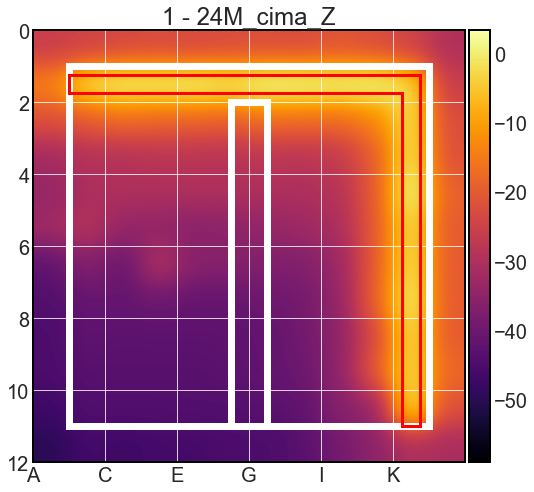

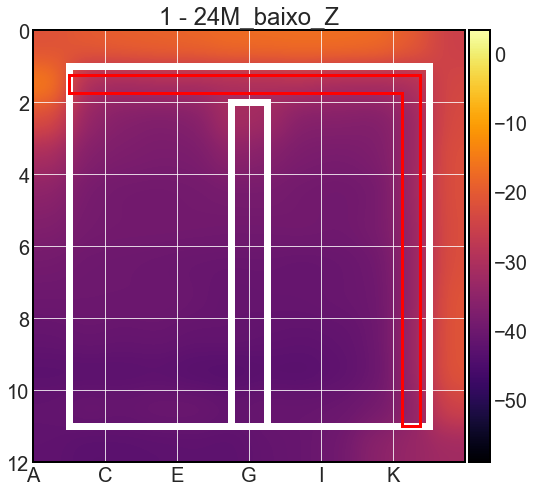

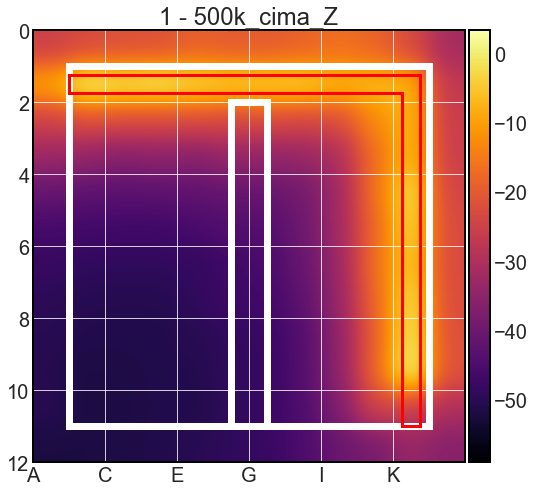

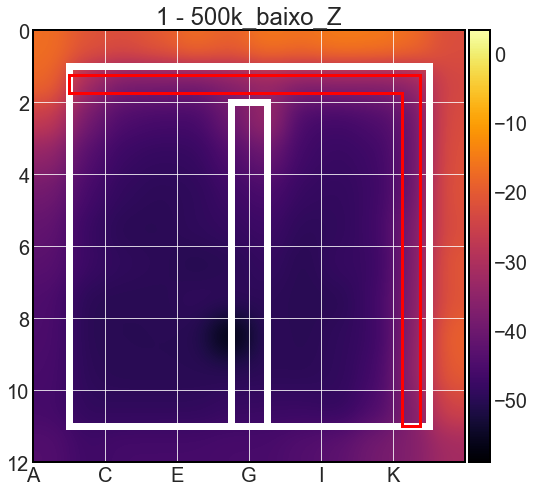

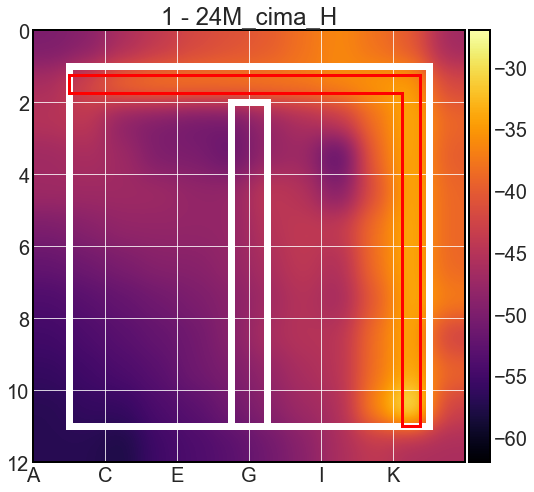

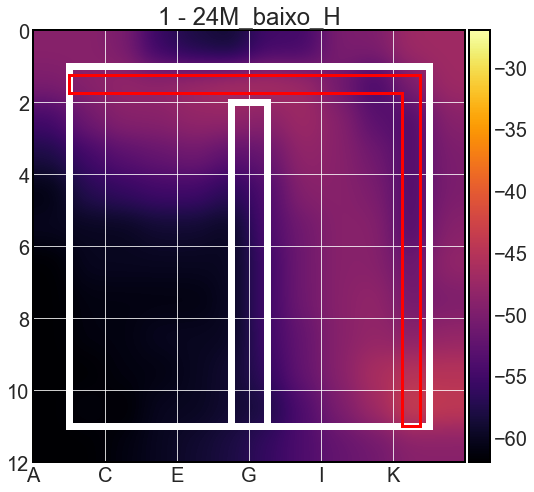

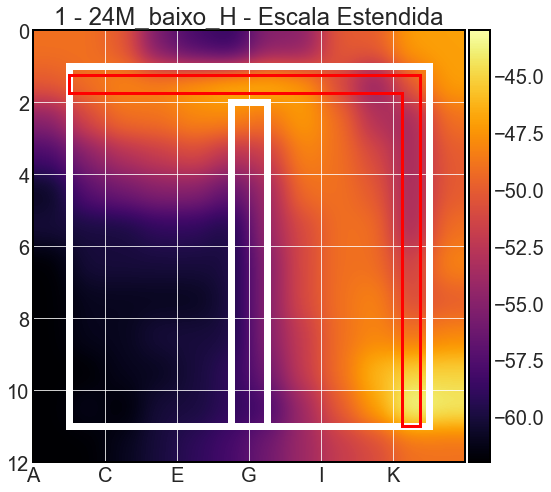

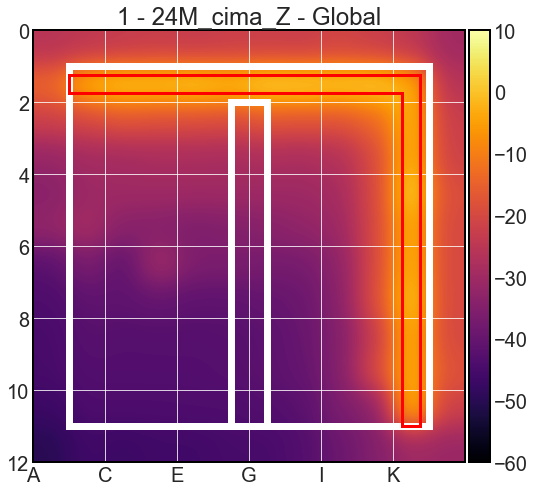

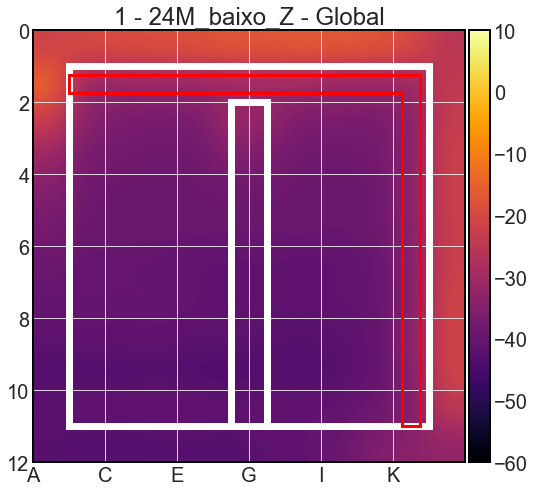

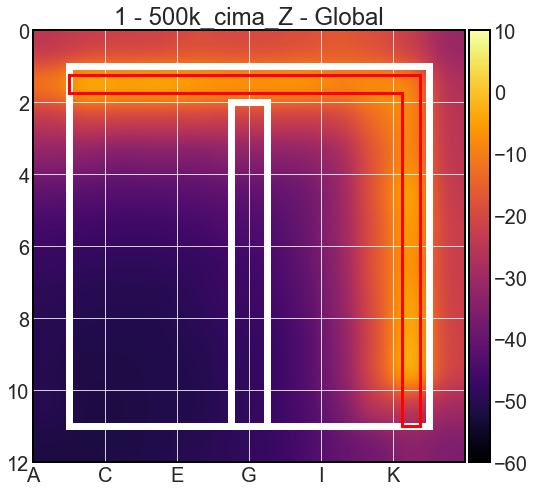

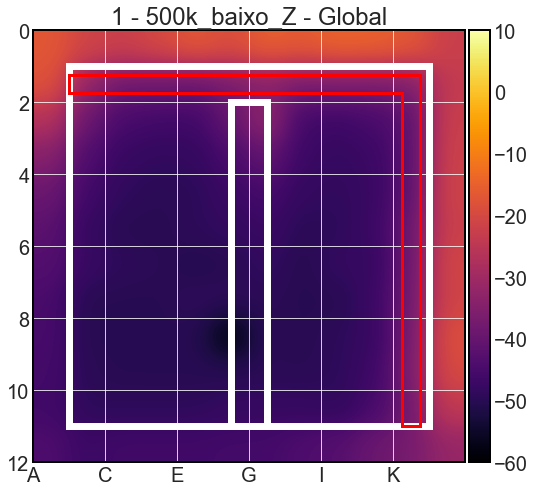

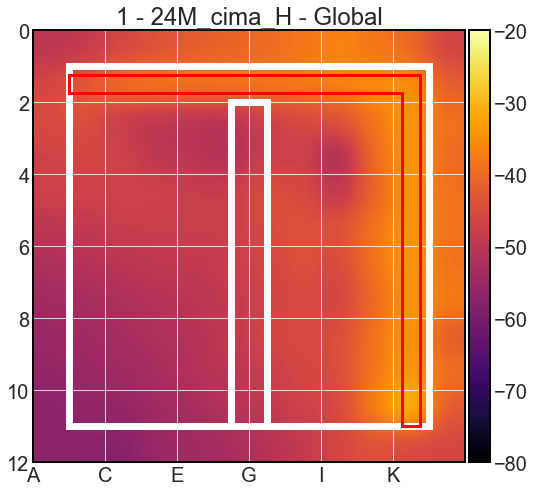

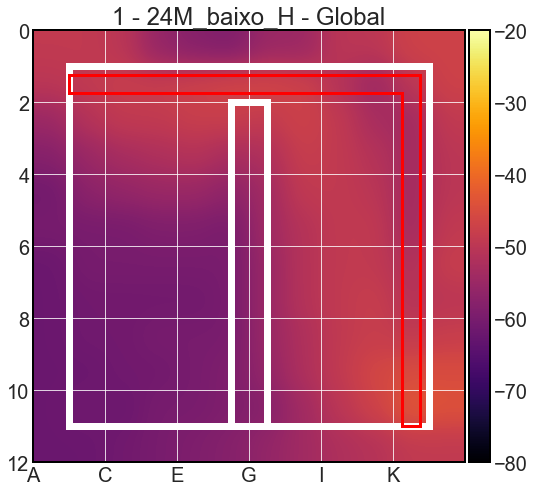

In [12]:
plot_heatmaps(frequencia1_cima_Z,frequencia1_cima_Z_name,
               frequencia1_baixo_Z,frequencia1_baixo_Z_name,
               frequencia2_cima_Z,frequencia2_cima_Z_name,
               frequencia2_baixo_Z,frequencia2_baixo_Z_name)
plot_heatmaps(frequencia1_cima_H,frequencia1_cima_H_name,frequencia1_baixo_H,frequencia1_baixo_H_name)
plot_heatmaps(frequencia1_baixo_H,frequencia1_baixo_H_name + ' - Escala Estendida')

plot_heatmaps_global_Z(frequencia1_cima_Z,frequencia1_cima_Z_name,
               frequencia1_baixo_Z,frequencia1_baixo_Z_name,
               frequencia2_cima_Z,frequencia2_cima_Z_name,
               frequencia2_baixo_Z,frequencia2_baixo_Z_name)
plot_heatmaps_global_H(frequencia1_cima_H,frequencia1_cima_H_name,frequencia1_baixo_H,frequencia1_baixo_H_name)

# 3D

** Inicialização para o 3D **

Para deixar interativo é só colocar `iterativo = 1`

In [13]:
interativo = 0

if interativo == 1:
    %matplotlib notebook
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
params = {'font.size': 14}
plt.rcParams.update(params)  

** Definição da função: **

A função `plot_3d` faz a plotagem em si do dataframe passado. É necessário passar os valores limites do eixo Z para se ter uma figura menos "extendida".

In [14]:
def plot_3d(data, title, vmax, vmin, save=0, foldername='tmp'):
    fig = plt.figure(figsize=(16,8))
    ax = fig.gca(projection='3d')

    # Make data.
    X, Y = np.mgrid[0:data.shape[0], 0:data.shape[1]]
    Z = data

    # Interpolation
    xnew, ynew = np.mgrid[0:data.shape[0]:50j, 0:data.shape[1]:50j]
    tck = interpolate.bisplrep(X, Y, Z, s=1500)
    znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

    # Plot the surface.
    surf = ax.plot_surface(xnew, ynew, znew, cmap='inferno', rstride=1,cstride=1,linewidth=False,alpha=None,antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_zlim3d(vmin, vmax)
    plt.title(title)
    fig = plt.gcf()
    #plt.show()
    
    if save == 1:
        for ii in range(0,360):
            ax.view_init(elev=20., azim=ii)
            fig.savefig("tmp/" + foldername + "/movie%d.png" % ii)
    

** Plotagem 3D **

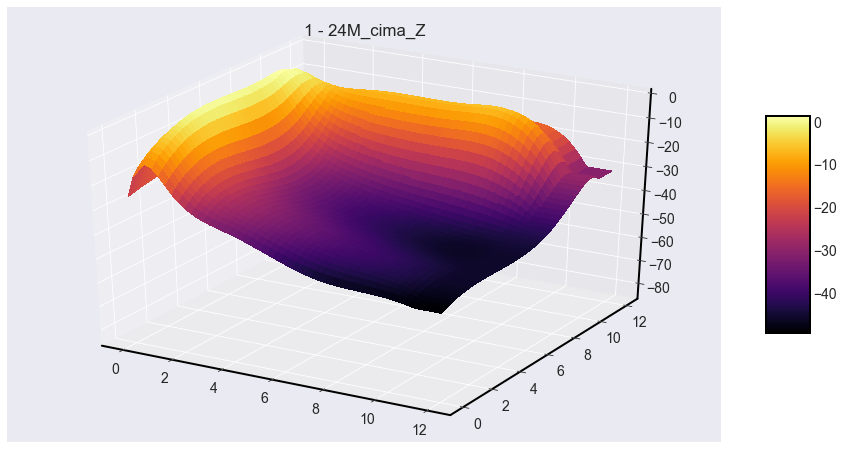

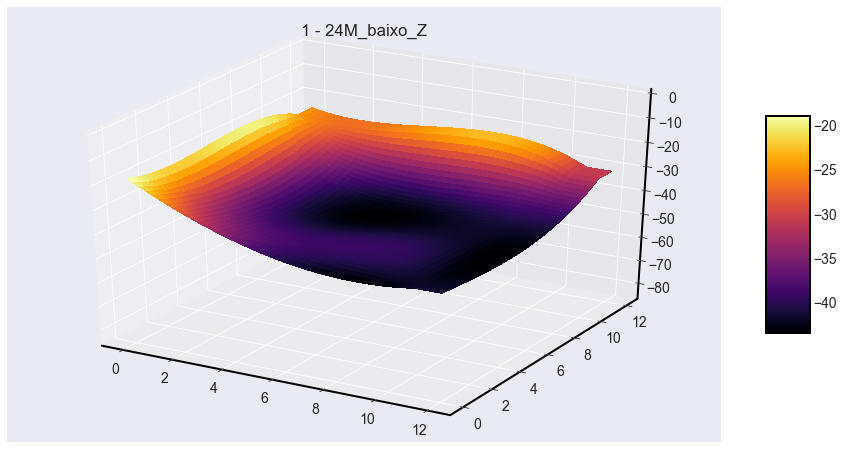

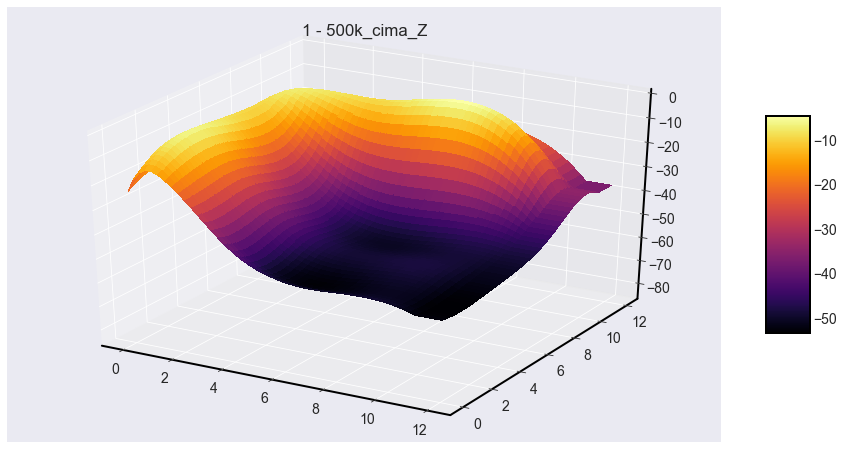

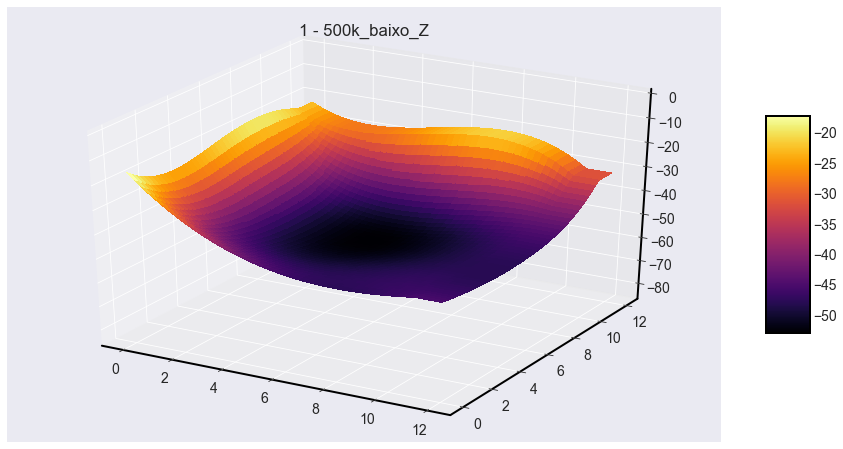

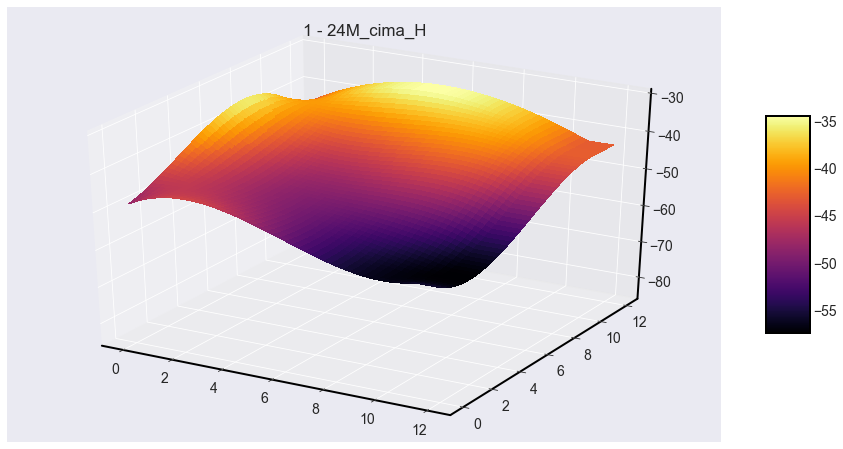

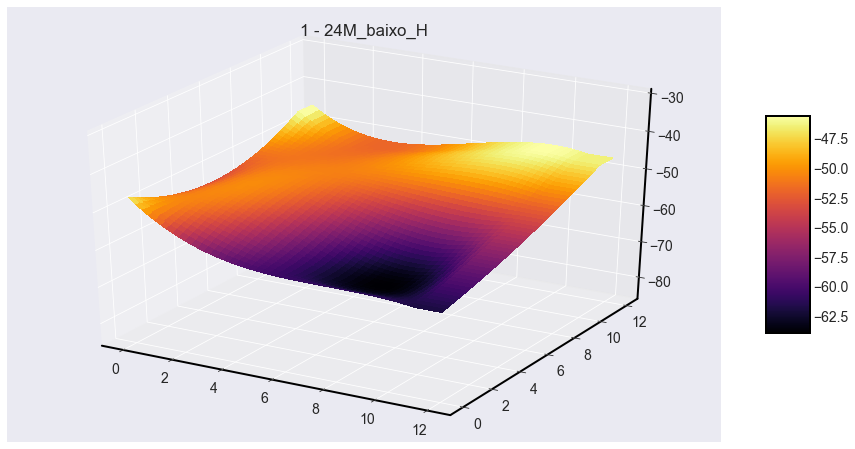

In [16]:
if save == 1:
    if not os.path.exists('tmp'):
        os.makedirs('tmp')
        os.makedirs('tmp/frequencia1_cima_Z')
        os.makedirs('tmp/frequencia1_baixo_Z')
        os.makedirs('tmp/frequencia2_cima_Z')
        os.makedirs('tmp/frequencia2_baixo_Z')
        os.makedirs('tmp/frequencia1_cima_H')
        os.makedirs('tmp/frequencia1_baixo_H')

vmax3d = 0
vmin3d = -85
plot_3d(frequencia1_cima_Z, frequencia1_cima_Z_name, vmax3d, vmin3d, save, 'frequencia1_cima_Z')
plot_3d(frequencia1_baixo_Z, frequencia1_baixo_Z_name, vmax3d, vmin3d, save, 'frequencia1_baixo_Z')
plot_3d(frequencia2_cima_Z, frequencia2_cima_Z_name, vmax3d, vmin3d, save, 'frequencia2_cima_Z')
plot_3d(frequencia2_baixo_Z, frequencia2_baixo_Z_name, vmax3d, vmin3d, save, 'frequencia2_baixo_Z')

vmax3d = -30
vmin3d = -85
plot_3d(frequencia1_cima_H, frequencia1_cima_H_name, vmax3d, vmin3d, save, 'frequencia1_cima_H')
plot_3d(frequencia1_baixo_H, frequencia1_baixo_H_name, vmax3d, vmin3d, save, 'frequencia1_baixo_H')